The invisible gorilla experiment


https://www.theinvisiblegorilla.com/



In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics

# define two classes
y_actual =["a", "b","a", "b", "c", "a", "b","c", "c", "a", "a", "b", "c"]
y_predict=["a", "b", "a", "a", "c", "a", "a", "b", "c", "a", "a", "c", "b"]

cm=metrics.confusion_matrix(y_actual, y_predict, labels=["a", "b", "c"])
print(cm)

[[5 0 0]
 [2 1 1]
 [0 2 2]]


In [ ]:
cm=metrics.classification_report(y_actual, y_predict, labels=["a", "b", "c"])
print(cm)

              precision    recall  f1-score   support

           a       0.71      1.00      0.83         5
           b       0.33      0.25      0.29         4
           c       0.67      0.50      0.57         4

    accuracy                           0.62        13
   macro avg       0.57      0.58      0.56        13
weighted avg       0.58      0.62      0.58        13



* Support is the number of actual occurrences of the class in the specified dataset.
* Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.
* Support doesn’t change between models but instead diagnoses the evaluation process.

[scikit classification_report](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html)

Macro Average
Computes the metric  independently for each class and then takes the simple average of these scores. In this calculation, every class is given equal weight, regardless of how many instances it has in the dataset.


Weighted Average
 it calculates the average by weighting each class's score by its support. The support is simply the number of true instances of that class in the dataset.

 $ = \frac{(Metric_{class1} * Support_{class1} + Metric_{class2} * Support_{class2} + ... + Metric_{classN} * Support_{classN)}{Total Number of Instances}$


In [ ]:
import numpy as np
from scipy.special import logit, expit

logit([0, 0.25, 0.5, 0.75, 1])

array([       -inf, -1.09861229,  0.        ,  1.09861229,         inf])

In [ ]:
#expit is inverse of logit
expit(logit([0.1, 0.75, 0.999]))

array([0.1  , 0.75 , 0.999])

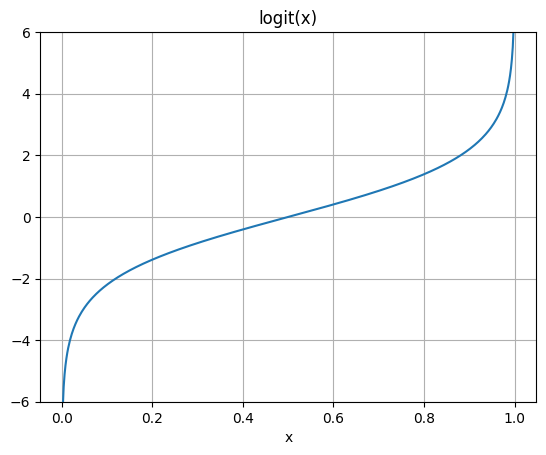

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 501)
y = logit(x)
plt.plot(x, y)
plt.grid()
plt.ylim(-6, 6)
plt.xlabel('x')
plt.title('logit(x)')
plt.show()

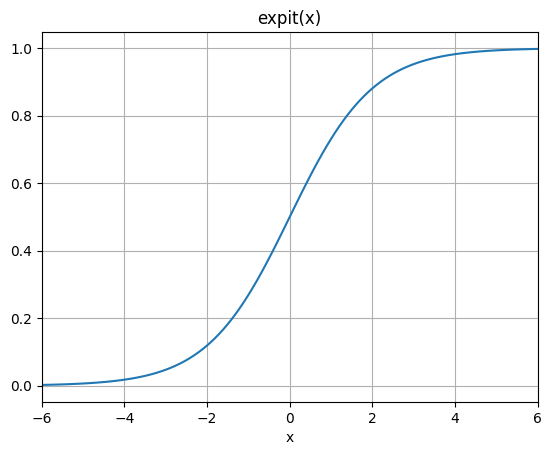

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import logit, expit

x = np.linspace(-6, 6, 121)
y = expit(x)
plt.plot(x, y)
plt.grid()
plt.xlim(-6, 6)
plt.xlabel('x')
plt.title('expit(x)')
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:13: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:33: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-26931478.py:13: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(x, y, styles[k], label=f'$\lambda$ = {lmbda:-4.1f}')
/tmp/ipython-input-26931478.py:15: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title('tklmbda(x, $\lambda$)')
/tmp/ipython-input-26931478.py:26: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(x, y, styles[k], label=f'$\lambda$ = {lmbda}')
/tmp/ipython-input-26931478.py:33: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title('tklmbda(x, $\lambda$)')


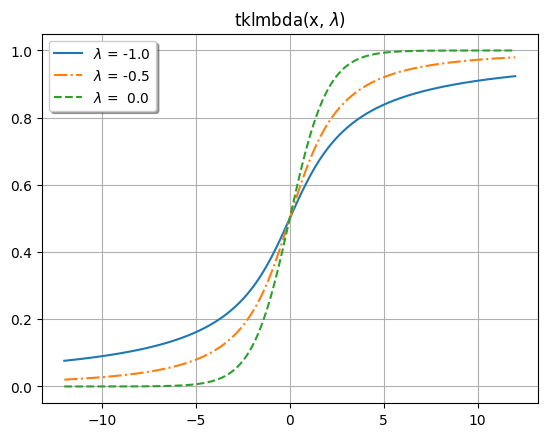

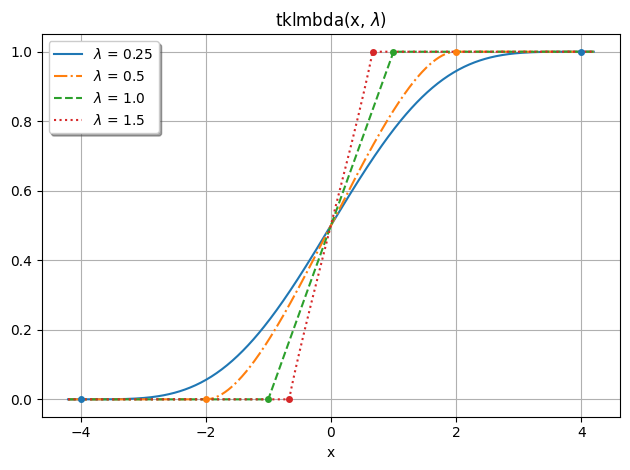

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.special import tklmbda, expit
# tklmbda -> Tukey lambda distribution

styles = ['-', '-.', '--', ':']
fig, ax = plt.subplots()
x = np.linspace(-12, 12, 500)
for k, lmbda in enumerate([-1.0, -0.5, 0.0]):
    y = tklmbda(x, lmbda)
    ax.plot(x, y, styles[k], label=f'$\lambda$ = {lmbda:-4.1f}')

ax.set_title('tklmbda(x, $\lambda$)')
ax.set_label('x')
ax.legend(framealpha=1, shadow=True)
ax.grid(True)

fig, ax = plt.subplots()

x = np.linspace(-4.2, 4.2, 500)
lmbdas = [0.25, 0.5, 1.0, 1.5]
for k, lmbda in enumerate(lmbdas):
    y = tklmbda(x, lmbda)
    ax.plot(x, y, styles[k], label=f'$\lambda$ = {lmbda}')

ax.set_prop_cycle(None)
for lmbda in lmbdas:
    ax.plot([-1/lmbda, 1/lmbda], [0, 1], '.', ms=8)


ax.set_title('tklmbda(x, $\lambda$)')
ax.set_xlabel('x')
ax.legend(framealpha=1, shadow=True)

ax.grid(True)
plt.tight_layout()
plt.show()

**0** stands for No purchase

**1** stands for Yes purchase


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [ ]:
from google.colab import files
uploaded  = files.upload()

Saving User_Data.csv to User_Data.csv


In [ ]:
= pd.read_csv('User_Data.csv')

In [ ]:
df.shape

(400, 5)

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Now, to predict whether a user will purchase product or not,

In [ ]:
#input
x=  df.iloc[:,[2,3]].values
#output
y= df.iloc[:,4].values

In [ ]:
print(x[0:10, :])

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]


In [ ]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=0)

In [ ]:
from sklearn import preprocessing
sc_x = preprocessing.StandardScaler()  # 0 mean and standard deviation 1.. to normalize them we use scaling
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [ ]:
print(xtrain[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [ ]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression(random_state=0)
classifier.fit(xtrain,ytrain)

LogisticRegression(random_state=0)

In [ ]:
y_predict=  classifier.predict(xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_predict)
print("COnfusion Matrix : \n", cm)

COnfusion Matrix : 
 [[65  3]
 [ 8 24]]


<Axes: >

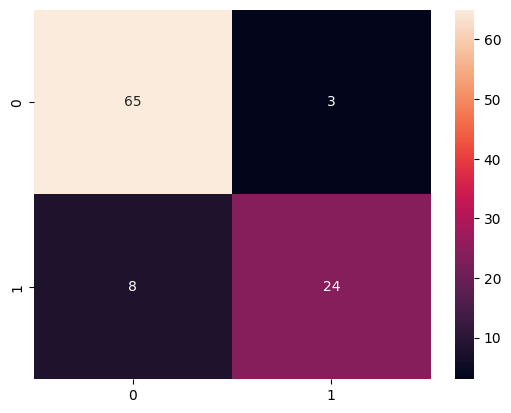

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(ytest, y_predict))

Accuracy :  0.89


/tmp/ipython-input-1194155856.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plot.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


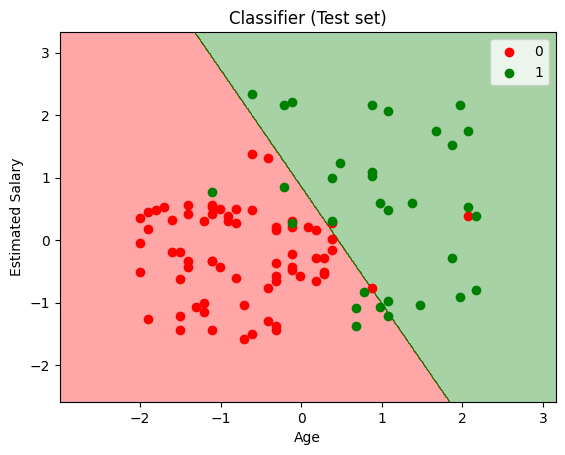

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plot.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.35, cmap = ListedColormap(('red', 'green')))

plot.xlim(X1.min(), X1.max())
plot.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plot.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)

plot.title('Classifier (Test set)')
plot.xlabel('Age')
plot.ylabel('Estimated Salary')
plot.legend()
plot.show()


In [ ]:
# More advance example



In [ ]:
import numpy as np
import matplotlib.pyplot as plot
from scipy import stats

import seaborn as sns
sns.set()

In [ ]:
from sklearn.datasets import fetch_lfw_people

#
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

# lookat  the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# Instead of providing 2D data, X has data already in the form  of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Print Details about dataset
print("Number of Data Samples: % d" % n_samples)
print("Size of a data sample: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)
print(target_names)
print(lfw_people.images.shape)

Number of Data Samples:  1288
Size of a data sample:  1850
Number of Class Labels:  7
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 50, 37)


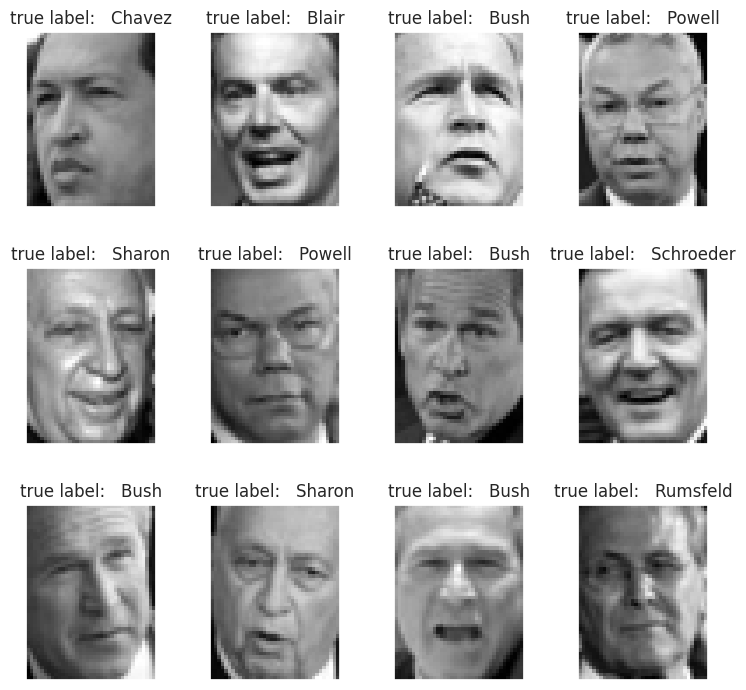

In [ ]:
# Function to plot images in 3 * 4
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plot.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plot.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plot.subplot(n_row, n_col, i + 1)
        plot.imshow(images[i].reshape((h, w)), cmap = plot.cm.gray)
        plot.title(titles[i], size = 12)
        plot.xticks(())
        plot.yticks(())

# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label:   % s' % (true_name)

true_titles = [true_title(y, target_names, i)
                     for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

In [ ]:
##splitting trainign and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(lfw_people.data, lfw_people.target,test_size=0.25, random_state=42)

In [ ]:
clf= model.fit(xtrain, ytrain)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = clf.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(ytest, y_pred, target_names = lfw_people.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.57      0.62      0.59        13
     Colin Powell       0.82      0.88      0.85        60
  Donald Rumsfeld       0.65      0.63      0.64        27
    George W Bush       0.90      0.92      0.91       146
Gerhard Schroeder       0.83      0.76      0.79        25
      Hugo Chavez       0.73      0.53      0.62        15
       Tony Blair       0.79      0.75      0.77        36

         accuracy                           0.83       322
        macro avg       0.76      0.73      0.74       322
     weighted avg       0.82      0.83      0.82       322



In [ ]:
print("Confusion Matrix is:")
print(confusion_matrix(ytest, y_pred, labels = range(n_classes)))

Confusion Matrix is:
[[  8   1   3   1   0   0   0]
 [  1  53   2   3   0   1   0]
 [  4   1  17   4   0   0   1]
 [  1   5   3 134   1   0   2]
 [  0   1   0   1  19   2   2]
 [  0   2   0   1   2   8   2]
 [  0   2   1   5   1   0  27]]


<Axes: >

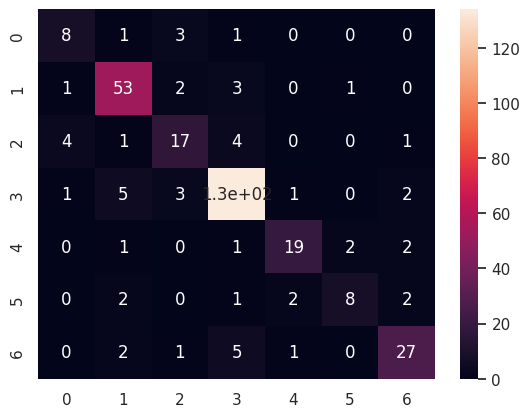

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(ytest, y_pred, labels = range(n_classes))), annot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#  (Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Logistic Regression with OVR (default)
log_reg_ovr = LogisticRegression(multi_class='ovr', solver='liblinear')
log_reg_ovr.fit(X_train, y_train)
y_pred_ovr = log_reg_ovr.predict(X_test)

print("OVR Accuracy:", accuracy_score(y_test, y_pred_ovr))

# Logistic Regression with Multinomial (Softmax)
log_reg_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg_multinomial.fit(X_train, y_train)
y_pred_multinomial = log_reg_multinomial.predict(X_test)

print("MLR Accuracy:", accuracy_score(y_test, y_pred_multinomial))


OVR Accuracy: 0.9666666666666667
MLR Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
